# Dataset Description

-> The sonar dataset consists of 208 rows, where 111 rows are the patterns obtained by bouncing sonar signals off a mine(metal cylinder) at various angles and under various conditions, whereas the remaining 97 rows are the patterns obtained from rocks under similar conditions. 

-> The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. 

-> The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

-> Each pattern is a set of 60 numbers in the range 0.0 to 1.0, which are the total number of columns.

-> Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

-> The label associated with each record contains the letter “R” if the object is a rock and “M” if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

-> We need to classify whether the objects are either rocks or mines and also we need to find the prediction. we will approach classification process for this problem statement.

In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset 

In [2]:
import pandas as pd
df=pd.read_csv('D:/Python file/Project Datasets/sonar_dataset.csv',header=None)  #Path location of the dataset 
df.head()  #Checking out the top 5 rows of the dataset

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
df.shape  #Checking out the dimensions of the data

(208, 61)

There are 208 rows and 61 columns as we gave header=None so that the index data has been added inside the dataset

# Data Preparation

In [4]:
#Checking out the statistical summary of the data
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Observations:

1.There are no missing values in the dataset.

2.There is not much difference between the mean and median so that we can estimate that there are no outliers present. But still, we can check the dataset whether there are outliers or not.

In [5]:
df.info()    #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

As there is only one categorical data, which is the target variable, we need to encode it and leave the other columns as it is.

In [6]:
df.isnull().sum()  #Checking whether there are missing values or not

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

As we can see, there are no NaN/Missing values in the dataset

# Using Principal Component Analysis to reduce data 

As we can see, the dataset is big and we need to compress the data. This can be done by using PCA process

# Step 1: Separating independent and dependent variables

In [7]:
x=df.iloc[:,0:-1]   #Separating independent variables using iloc function
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [8]:
x.shape   #Dimensions of dependent variables

(208, 60)

In [9]:
y=df.iloc[:,-1]   #Dependent variable/Target variable
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

The target variable consists of 'R'(Rocks) and 'M'(Mines)

# Step 2: Reduce x data using PCA

In [10]:
#Importing PCA from decomposition module
from sklearn.decomposition import PCA
pca=PCA(n_components=10) #We are compressing 60 columns into 10 columns
x=pca.fit_transform(x)  #Transforming x data into PCA

In [11]:
x=pd.DataFrame(data=x)  #Coverting transformed data into dataframe
x

,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277
...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120


# Encoding Categorical Data

As dependent variable consists of categorical data, we need to encode the data and it can be done by using LabelEncoder

In [12]:
#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()   #Instance of the class

In [13]:
y=le.fit_transform(y)   #Encoding the data from category to numeric
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Here 1 represents R(Rocks) whereas 0 represents M(Mines)

# Checking skewness of the data

In [14]:
x.skew()

0    0.177056
1    0.403361
2    0.179856
3    0.437246
4   -0.081498
5    0.260802
6    0.407128
7    0.058413
8   -0.223131
9   -0.266651
dtype: float64

There is no skewness of data present as it is in the range -0.5 to +0.5

# Checking the percentage of data falling under outliers

In [15]:
#We can use zscore for checking the percentage
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([146, 164, 171], dtype=int64), array([9, 6, 7], dtype=int64))

In [16]:
#Removing outliers
df_new=x[(z<3).all(axis=1)]
df_new

,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277
...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120


In [17]:
x.shape  #Original dataset dimensions

(208, 10)

In [18]:
df_new.shape  #New dataset dimensions

(205, 10)

In [19]:
#Removing outliers
df_new1=y[(z<3).all(axis=1)]
df_new1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [20]:
df_new1.shape

(205,)

3 rows had outliers and they are removed by using zscore

# Percentage loss of data while removing outliers

In [21]:
percentage_loss=((3)/208)*100
print(percentage_loss)

1.4423076923076923


The percentage loss of data is very less and we don't need to remove outliers further

# Building the model

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [22]:
x=df_new
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277


In [23]:
x.shape

(205, 10)

In [24]:
y=df_new1
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [25]:
y.shape

(205,)

In [26]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(x)

In [27]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
#Creating train_test_split with random_state
x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.20,random_state=42)

# Finding out the best model

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)  
print('Accuracy score:\n ',accuracy_score(y_test,pred_lr))
print('\n')
print('Confusion Matrix:\n ',confusion_matrix(y_test,pred_lr))
print('\n')
print('Classification report:\n')
print(classification_report(y_test,pred_lr))

Accuracy score:
  0.6341463414634146


Confusion Matrix:
  [[13  9]
 [ 6 13]]


Classification report:

              precision    recall  f1-score   support

           0       0.68      0.59      0.63        22
           1       0.59      0.68      0.63        19

    accuracy                           0.63        41
   macro avg       0.64      0.64      0.63        41
weighted avg       0.64      0.63      0.63        41



# Naive Bayes Classifier

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print('Accuracy score:\n ',accuracy_score(y_test,predgnb))
print('\n')
print('Confusion Matrix:\n ',confusion_matrix(y_test,predgnb))
print('\n')
print('Classification report:\n')
print(classification_report(y_test,predgnb))

Accuracy score:
  0.6585365853658537


Confusion Matrix:
  [[14  8]
 [ 6 13]]


Classification report:

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        22
           1       0.62      0.68      0.65        19

    accuracy                           0.66        41
   macro avg       0.66      0.66      0.66        41
weighted avg       0.66      0.66      0.66        41



# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score:\n ',accuracy_score(y_test,preddtc))
print('\n')
print('Confusion Matrix:\n ',confusion_matrix(y_test,preddtc))
print('\n')
print('Classification report:\n')
print(classification_report(y_test,preddtc))

Accuracy score:
  0.7073170731707317


Confusion Matrix:
  [[13  9]
 [ 3 16]]


Classification report:

              precision    recall  f1-score   support

           0       0.81      0.59      0.68        22
           1       0.64      0.84      0.73        19

    accuracy                           0.71        41
   macro avg       0.73      0.72      0.71        41
weighted avg       0.73      0.71      0.70        41



# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score:\n ',accuracy_score(y_test,predrf))
print('\n')
print('Confusion Matrix:\n ',confusion_matrix(y_test,predrf))
print('\n')
print('Classification report:\n')
print(classification_report(y_test,predrf))

Accuracy score:
  0.7317073170731707


Confusion Matrix:
  [[14  8]
 [ 3 16]]


Classification report:

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        22
           1       0.67      0.84      0.74        19

    accuracy                           0.73        41
   macro avg       0.75      0.74      0.73        41
weighted avg       0.75      0.73      0.73        41



From the above model, we can say that RandomForestClassifier has more accuracy compared to other models and we will perform further process with it.

# Plotting AUC-ROC curve 

In [33]:
#Importing the required libraries
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
p=rf.predict(x_test)

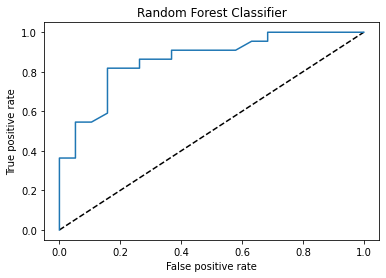

In [35]:
#Random Forest Curve
y_pred_prob=rf.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [36]:
#Finding auc_score
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

0.7392344497607656

# Calculating cross-validation score

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
rfscores=cross_val_score(rf,x,y,cv=5,scoring='accuracy')    #For Random Forest Classifier
print('Scores:',rfscores)
print('Mean value of the scores: ',rfscores.mean())
print('Standard Deviation: ',rfscores.std())

Scores: [0.36585366 0.68292683 0.41463415 0.75609756 0.41463415]
Mean value of the scores:  0.526829268292683
Standard Deviation:  0.1600118972376266


# Hyperparameter Tuning

A technique used to find out the best parameter for our model to improve the accuracy

In [39]:
#Creating parameters list
parameters={'n_estimators':[10,100,500,1000],'criterion' :['gini', 'entropy']}

In [40]:
#Using GridSearchCV to run the parameters and checking final accuracy
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
#Initializing GridSearchCV

GCV.fit(x_train,y_train)
print(GCV.best_params_)
print(GCV.best_score_)

{'criterion': 'gini', 'n_estimators': 500}
0.8231060606060605


In [41]:
rfc1=RandomForestClassifier(random_state=42,n_estimators=10,criterion='gini')
rfc1.fit(x_train,y_train)
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.7804878048780488


After hyperparameter tuning, we can see that accuracy has been increased from 73% to 78% and hence the model is fit with cv score nearly 52% and accuracy 78%

# Saving the model

In [42]:
import joblib
joblib.dump(rfc1,'SonarDatasetProject.pkl')

['SonarDatasetProject.pkl']